In [ ]:
# we want to test for ourselves if we take a sample... (z test)
# you can do it in very few lines of code if you do it the happy (data science) way


In [2]:
import numpy as np # for statistics
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# set a random seed
np.random.seed(999)

# first we have to choose what kind of parent population we want
# keep it simple and create a sample population

mymean = 800.
mystdev = 14.
Nsamples = 100
nit = 1000 #number of iterations
myDmeans = np.zeros(nit)
# can also use np.random.randn
# putting it into a loop to create multiple child samples
for i in range(nit):
    mydistrib = sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=Nsamples) # takes the location (mean) and scale (std)
    myDmean = mydistrib.mean()
    myDmeans[i] = mydistrib.mean()
# take a sample from the population of size 100



(array([   6.,   40.,  134.,  278.,  250.,  197.,   81.,   12.,    1.,    1.]),
 array([ 795.5544249 ,  796.61441607,  797.67440725,  798.73439842,
         799.79438959,  800.85438077,  801.91437194,  802.97436311,
         804.03435428,  805.09434546,  806.15433663]),
 <a list of 10 Patch objects>)

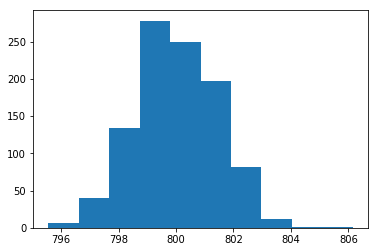

In [6]:
# this is not the z statistic though
pl.hist(myDmeans)

(array([  3.,   4.,  11.,   9.,  16.,  19.,  20.,  12.,   5.,   1.]),
 array([ 758.99750286,  766.5953072 ,  774.19311154,  781.79091589,
         789.38872023,  796.98652457,  804.58432892,  812.18213326,
         819.7799376 ,  827.37774195,  834.97554629]),
 <a list of 10 Patch objects>)

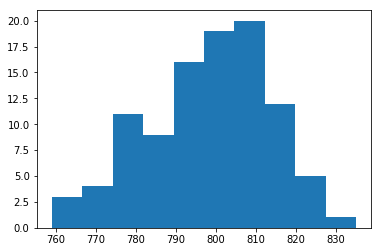

In [7]:
# let's take a histogram of it
# rvs is how you draw a sample from the parent distribution
pl.hist(sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=100))

In [8]:
# what is the z test?
# It measures the difference between the means (parent pop and sample)
# divides by stdev over square root of N

# 

(array([   1.,    1.,   12.,   81.,  197.,  250.,  278.,  134.,   40.,    6.]),
 array([-4.39595474, -3.63881818, -2.88168163, -2.12454508, -1.36740853,
        -0.61027198,  0.14686458,  0.90400113,  1.66113768,  2.41827423,
         3.17541079]),
 <a list of 10 Patch objects>)

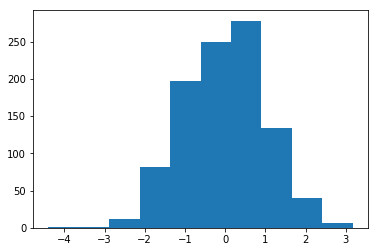

In [10]:
zs = (mymean - myDmeans) * np.sqrt(Nsamples) / mystdev# should give me an array, myDmeans is sample means
# each one of those has to be multiplied by N samples (remember the formula)
pl.hist(zs)
# don't need absolute value bc it's a one-side test
# from below, 

In [ ]:
# if this wasn't a HW you could stop here
# for HW, we will test whether samples are reasonable representation of the model in another manner


In [11]:
sp.stats.kstest(zs, 'norm') # not 2 sample ks test, but ks test
# p-value is 0.36, so if our alpha was 0.05 we can't reject NH
# tells us whether samples come from parent distro

KstestResult(statistic=0.029078852995795657, pvalue=0.3615543791026623)